# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_labels.csv, test_inputs.csv, test_labels.csv) in the Colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [ ]:
from google.colab import files
uploaded = files.upload()
%ls

sample_data/     test_labels.csv   train_labels.csv
test_inputs.csv  train_inputs.csv


# Import libraries 
Do not use any other Python library.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function: load_knn_data

This function loads the data for KNN from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels




  



In [ ]:
def load_knn_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

# Function: predict_knn

This function uses the KNN classifier to predict the label of a data point.

Inputs:
*   **x**: input data point for which we want to predict the label (numpy array of M features)
*   **inputs**: matrix of data points in which neighbours will be found (numpy array of N data points x M features)
*   **labels**: vector of labels associated with the data points  (numpy array of N labels)
*   **k_neighbours**: # of nearest neighbours that will be used

Output:
*   **predicted_label**: predicted label (integer)




In [ ]:
import heapq
def predict_knn(x,inputs, labels, k_neighbours):
  labels=labels.tolist()
  dislist=[]
  for i in range(inputs.shape[0]):
      x_p =inputs[i]
      Distance =np.linalg.norm((x-x_p),2)
      dislist.append(Distance)
  k_neigh= heapq.nsmallest(k_neighbours,dislist)
  nearestlables=[]
  for item in k_neigh:
    nearestlables.append(labels[dislist.index(item)])
  temp=np.bincount(nearestlables)
  predicted_values=np.argmax(temp)
  
  return predicted_values
#predict_knn(train_inputs[120], train_inputs,train_labels,3)




# Function: eval_knn

Function that evaluates the accuracy of the KNN classifier on a dataset.  The dataset to be evaluated consists of (inputs, labels).  The dataset used to find nearest neighbours consists of (train_inputs, train_labels).

Inputs:
*   **inputs**: matrix of input data points to be evaluated (numpy array of N data points x M features)
*   **labels**: vector of target labels for the inputs (numpy array of N labels)
*   **train_inputs**: matrix of input data points in which neighbours will be found (numpy array of N' data points x M features)
*   **train_labels**: vector of labels for the training inputs (numpy array of N' labels)
*   **k_neighbours**: # of nearest neighbours to be used (integer)

Outputs:
*   **accuracy**: percentage of correctly labeled data points (float)




In [ ]:
def eval_knn(inputs, labels, train_inputs, train_labels, k_neighbours):
  labels = labels.tolist()
  predicted_labels = []
  for x in inputs:
    pred_label = predict_knn(x,train_inputs,train_labels,k_neighbours)
    predicted_labels.append(pred_label)
  
  ## for calculating accuracy
  accuracy = 0
  for index, item in enumerate(predicted_labels):
    if item == labels[index]:
      accuracy += 1
  accuracy= accuracy/ len(labels)
  return accuracy
#eval_knn(test_inputs,test_labels, train_inputs, train_labels,3)

# Function: cross_validation_knn

This function performs k-fold cross validation to determine the best number of neighbours for KNN.

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different # of neighbours (list of integers)
*   **inputs**: matrix of data points to be used when searching for neighbours (numpy array of N data points by M features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)

Outputs:
*   **best_hyperparam**: best # of neighbours for KNN (integer)
*   **best_accuracy**: accuracy achieved with best_hyperparam (float)
*   **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)





In [ ]:
import copy
def cross_validation_knn(k_folds, hyperparameters, inputs, labels):
  dataset= np.concatenate((inputs,labels.reshape(-1,1)),axis=1)
  np.random.shuffle(dataset)
  dataset_split= np.split(dataset,k_folds)
  accu_result=[]
  for k_param in hyperparameters:
    k_accu= []
    for i in range(k_folds):
      dataset_copy = copy.deepcopy(dataset_split)
      test =np.array(dataset_copy.pop(i))
      train=np.array(dataset_copy)
      train= train.reshape(train.shape[0]*train.shape[1],train.shape[2])
      accuracy=eval_knn(test[:,:-1], test[:,-1],train[:,:-1],train[:,-1],k_param)
      k_accu.append(accuracy)
    accu_result.append(np.mean(k_accu))  
  best_accuracy = np.max(accu_result)
  best_hyperparam=hyperparameters[accu_result.index(best_accuracy)]
  accuracies = accu_result
  return best_hyperparam, best_accuracy, accuracies

# Function: plot_knn_accuracies

Function that plots the KNN accuracies for different # of neighbours (hyperparameters) based on cross validation

Inputs:
*   **accuracies**: vector of accuracies for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different # of neighbours (list of integers)


In [ ]:
def plot_knn_accuracies(accuracies,hyperparams):
  plt.plot(hyperparams,accuracies)
  plt.ylabel('accuracy')
  plt.xlabel('k neighbours')
  plt.show()  

# Main KNN code

Load data.
Use k-fold cross validation to find the best # of neighbours for KNN.
Plot accuracies for different # of neighbours.
Test KNN with the best # of neighbours.

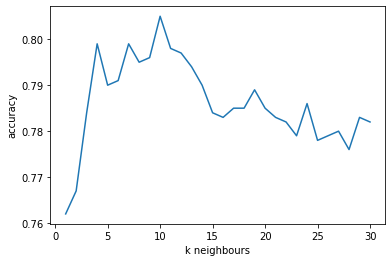

best # of neighbours k: 10
best cross validation accuracy: 0.805
test accuracy: 0.7636363636363637


In [ ]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_knn_data()

# number of neighbours to be evaluated by cross validation
hyperparams = range(1,31)
k_folds = 10
best_k_neighbours, best_accuracy, accuracies = cross_validation_knn(k_folds, hyperparams, train_inputs, train_labels)

# plot results
plot_knn_accuracies(accuracies, hyperparams)
print('best # of neighbours k: ' + str(best_k_neighbours))
print('best cross validation accuracy: ' + str(best_accuracy))

# evaluate with best # of neighbours
accuracy = eval_knn(test_inputs, test_labels, train_inputs, train_labels, best_k_neighbours)
print('test accuracy: '+ str(accuracy))